In [85]:
import numpy as np
import pandas as pd

# Data extraction

In [86]:
# Read raw data from excel
static_expreriments_data = pd.read_excel('data/biogas_data_clean.xlsx', sheet_name='static', header=None)


In [87]:
# Data in excel are not in the desired form, we need to extract and arrange in proper way
inputs = static_expreriments_data.iloc[:3,1::6].astype(float).to_numpy().transpose()
outputs1 = static_expreriments_data.iloc[5:,1::6].astype(float).to_numpy()
outputs2 = static_expreriments_data.iloc[5:,5::6].astype(float).to_numpy()
outputs2 = outputs2/1000 # scale down to particles per thousand fro particles per million

In [88]:
# Make sure dimensions are equal
assert outputs1.shape == outputs2.shape
assert inputs.shape[0] == outputs1.shape[1]
assert inputs.shape[1] == 3

In [89]:
timesteps = outputs1.shape[0]
num_batches = outputs1.shape[1]
print(f"There are {num_batches} expreriments (batches) with {timesteps} timesteps in each one")

There are 100 expreriments (batches) with 160 timesteps in each one


In [90]:
# Extract the data in the proper form and convert each batch to DataFrame
# Store all batches in a list
batches = list()
for i in range(num_batches):
    temp_inputs = np.tile(inputs[i],(timesteps,1))
    temp_outputs = np.column_stack((outputs1[:,i], outputs2[:,i]))
    temp_batch = np.column_stack((temp_inputs, temp_outputs))
    batch = pd.DataFrame(temp_batch, columns=['Cow','Pig','Poultry','CH4','NH4'])
    batch.index.name = 'Day'
    batches.append(batch)

In [91]:
data_static = pd.concat(batches)

In [92]:
# Write all data to csv file
data_static.to_csv('data/biogas_data_static.csv')

In [93]:
data_static

,Cow,Pig,Poultry,CH4,NH4
Day,,,,,
0,1.94517,0.0,0.0,0.142604,1.987455
1,1.94517,0.0,0.0,0.248523,1.947849
2,1.94517,0.0,0.0,0.311715,1.911524
3,1.94517,0.0,0.0,0.346660,1.879808
4,1.94517,0.0,0.0,0.368441,1.853614
...,...,...,...,...,...
155,0.00000,0.0,2.0,0.525224,4.300208
156,0.00000,0.0,2.0,0.540672,4.300210
157,0.00000,0.0,2.0,0.525224,4.300212


# Data Exploration

In [94]:
data_static.describe()

,Cow,Pig,Poultry,CH4,NH4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,1.212354,0.148129,0.639094,0.473036,2.727266
std,0.430571,0.198039,0.630347,0.127676,1.097120
min,0.000000,0.000000,0.000000,0.073312,0.536504
25%,1.060117,0.037516,0.188605,0.375397,1.945406
50%,1.167102,0.112549,0.595594,0.455524,2.453202
75%,1.458877,0.187582,0.992657,0.559551,3.313546
max,3.000000,1.500000,3.970628,1.372294,8.537280


In [95]:
data_static.corr(method='spearman')

,Cow,Pig,Poultry,CH4,NH4
Cow,1.000000,-0.364987,-0.369132,0.065606,-0.403167
Pig,-0.364987,1.000000,-0.473535,-0.320699,-0.305592
Poultry,-0.369132,-0.473535,1.000000,0.577364,0.881201
CH4,0.065606,-0.320699,0.577364,1.000000,0.564907
NH4,-0.403167,-0.305592,0.881201,0.564907,1.000000


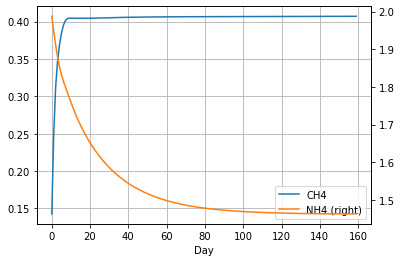

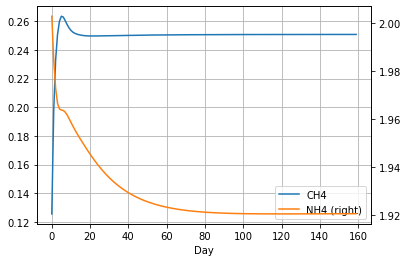

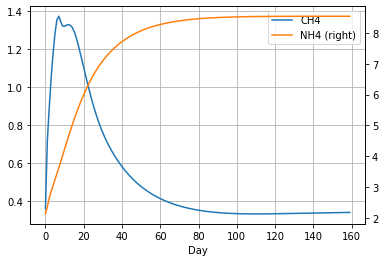

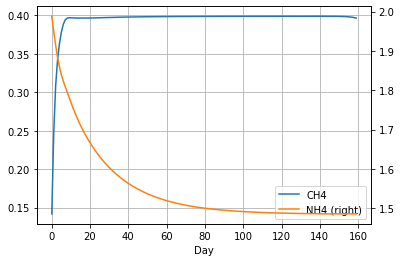

In [96]:
for i in range(4):
    batches[i][['CH4','NH4']].plot(secondary_y=['NH4'], grid=True)

<AxesSubplot:>

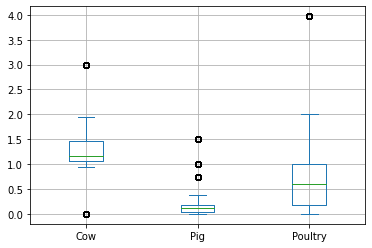

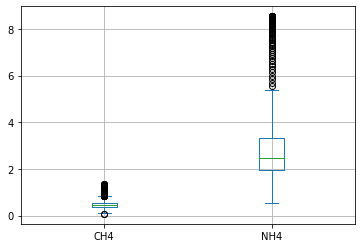

In [97]:
data_static[['Cow','Pig','Poultry']].plot(kind='box', grid=True)
data_static[['CH4','NH4']].plot(kind='box', grid=True)

array([[<AxesSubplot:title={'center':'Cow'}>,
        <AxesSubplot:title={'center':'Pig'}>],
       [<AxesSubplot:title={'center':'Poultry'}>,
        <AxesSubplot:title={'center':'CH4'}>],
       [<AxesSubplot:title={'center':'NH4'}>, <AxesSubplot:>]],
      dtype=object)

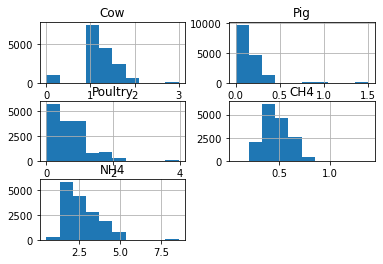

In [98]:
data_static.hist()

# Dynamic experiments

In [99]:
# Read raw data from excel

dbatches = list()
for i in range(6):
    temp_batch = pd.read_excel('data/biogas_data_clean.xlsx', sheet_name='dynamic', header=None, usecols=range(i*5,(i+1)*5))
    temp_batch.dropna(axis=0, inplace=True)
    temp_batch.columns = ['Cow','Pig','Poultry','CH4','NH4']
    temp_batch['NH4'] = temp_batch['NH4'] / 1000
    temp_batch.index.name = 'Day'
    dbatches.append(temp_batch)
    
dbatches[0]

,Cow,Pig,Poultry,CH4,NH4
Day,,,,,
0,1.556136,0.000000,0.794126,0.198188,2.015018
1,1.556136,0.000000,0.794126,0.374099,2.019187
2,1.556136,0.000000,0.794126,0.478677,2.040260
3,1.556136,0.000000,0.794126,0.536239,2.072086
4,1.556136,0.000000,0.794126,0.563551,2.105631
...,...,...,...,...,...
255,0.778068,0.225098,1.191189,0.361340,4.123222
256,0.778068,0.225098,1.191189,0.356035,4.122242
257,0.778068,0.225098,1.191189,0.350861,4.121123


In [100]:
data_dynamic = pd.concat(dbatches)

In [101]:
data_dynamic.describe()

,Cow,Pig,Poultry,CH4,NH4
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,1.191652,0.133310,0.832675,0.561765,3.070213
std,0.278779,0.095834,0.339052,0.087573,0.545215
min,0.583551,0.000000,0.397063,0.194236,2.015018
25%,0.972585,0.000000,0.397063,0.473690,2.658955
50%,1.361619,0.150065,0.794126,0.581294,2.958318
75%,1.361619,0.225098,1.191189,0.626123,3.455048
max,1.556136,0.225098,1.588251,0.711399,4.627192


In [102]:
data_dynamic.corr(method='spearman')

,Cow,Pig,Poultry,CH4,NH4
Cow,1.000000,-0.893229,-0.318940,0.127108,-0.319961
Pig,-0.893229,1.000000,-0.123221,-0.488419,0.048832
Poultry,-0.318940,-0.123221,1.000000,0.754603,0.599504
CH4,0.127108,-0.488419,0.754603,1.000000,0.458757
NH4,-0.319961,0.048832,0.599504,0.458757,1.000000


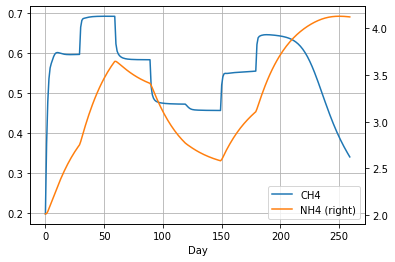

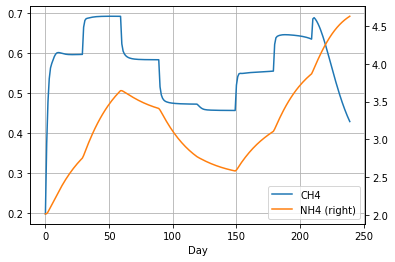

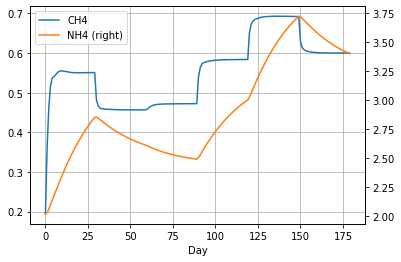

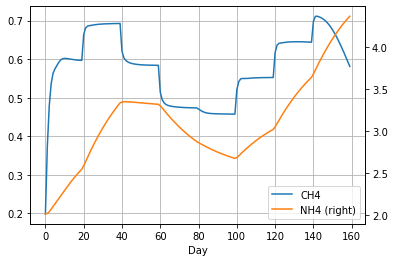

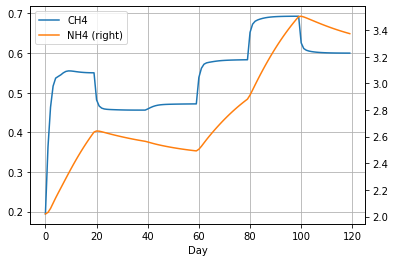

In [109]:
for i in range(5):
    dbatches[i][['CH4','NH4']].plot(secondary_y=['NH4'], grid=True)

<AxesSubplot:>

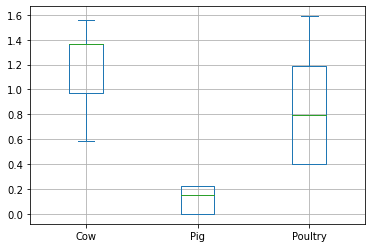

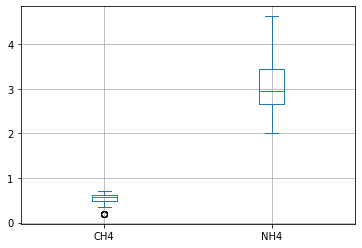

In [104]:
data_dynamic[['Cow','Pig','Poultry']].plot(kind='box', grid=True)
data_dynamic[['CH4','NH4']].plot(kind='box', grid=True)

array([[<AxesSubplot:title={'center':'Cow'}>,
        <AxesSubplot:title={'center':'Pig'}>],
       [<AxesSubplot:title={'center':'Poultry'}>,
        <AxesSubplot:title={'center':'CH4'}>],
       [<AxesSubplot:title={'center':'NH4'}>, <AxesSubplot:>]],
      dtype=object)

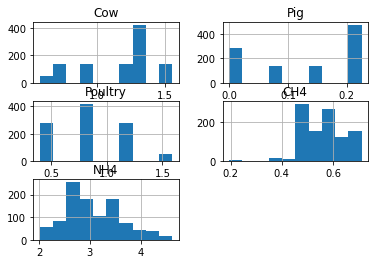

In [105]:
data_dynamic.hist()

In [106]:
for i in range(6):
    filepath = f'data/dynamic_experiment_{i}.csv'
    data_dynamic.to_csv(filepath)
    